add analysis here

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [18]:
# create open lists for max tem, humidity, cloudiness, wind speed, country, and date
city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# record = 1
# Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
# query = query_url + city

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response ["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

    
   
        print(f"City found!")

#         record = record + 1
    except:
        pass
        print(f"City not found. We'll skip it")
       
# Include a print log of each city as it's being processed (with the city number and city name)


City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City not found. We'll skip it
City found!
City found!
City found!
City found!
City not found. We'll skip it
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City found!
City not found. We'll skip it
City found!
City found!
City found!
City found!
City found

In [7]:

weather_data = {"City": city_name,
"Latitude":lat,
"Longitude":long,
"Max Temp":max_temp,
"Humidity":humidity,
"Cloudiness":cloudiness,
"Wind Speed":wind_speed,
"Country":country,
"Date":date
}
weather_df=pd.DataFrame(weather_data)

# # Export the city data into a .csv.
weather_df.to_csv("resources/weather_data.csv")
# Display the DataFrame
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.98,-114.06,88.12,43,0,14.05,MX,1596234235
1,Port Elizabeth,-33.92,25.57,50.00,93,0,2.24,ZA,1596234250
2,Molchanovo,57.58,83.77,53.60,93,100,3.33,RU,1596234250
3,Beringovskiy,63.05,179.32,51.85,68,63,6.26,RU,1596234251
4,Snyder,32.72,-100.92,86.00,40,1,8.05,US,1596234251


In [24]:
#  Inspect the data and remove the cities where the humidity > 100%.
#  Get the indices of cities that have humidity over 100%.
print(weather_df[weather_df["Humidity"] == 100].index.values)

[ 40  50  68 115 187 233 238 268 285 306 368 463 513 534 537]


In [ ]:
 # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [ ]:
#Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

# Lat vs temp plot
# lat vs. humidity plot
# lat vs cloudiness
# lat vs wind speed



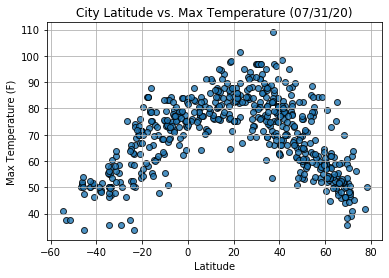

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(weather_df["Latitude"],
            weather_df["Max Temp"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
# plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

In [ ]:
#  Linear Regression
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames    